# Horvath silico

author: steeve.laquitaine@epfl.ch  
date:  24.11.2023  
purpose: show single, multi-units and background noise component of a recording of probe 1


### Setup

Activate `npx_10m_384ch_unit_classes` venv

In [2]:
from matplotlib import pyplot as plt
import os

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(PROJ_PATH)

from src.nodes.utils import get_config
from src.nodes.dataeng.silico import probe_wiring

# SETUP PARAMETERS
EXPERIMENT = "silico_horvath"
SIMULATION_DATE = "concatenated/probe_1"
data_conf, param_conf = get_config(EXPERIMENT, SIMULATION_DATE).values()

# SET PLOT PARAMS
DURATION = 1.01
CHANNEL_ID = 10

2023-12-06 17:09:36,280 - root - utils.py - get_config - INFO - Reading experiment config.
2023-12-06 17:09:36,291 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [36]:
# load
# - preprocess (sampling frequency is 20,000 Hz)
Recording = probe_wiring.load(data_conf)
Recording_pre = spre.bandpass_filter(Recording, freq_min=300, freq_max=(20000 / 2 - 1))
trace = spre.common_reference(Recording_pre, reference="global", operator="median")
trace

CommonReferenceRecording: 128 channels - 1 segments - 20.0kHz - 1077.999s

In [6]:
# takes 4 min
traces = trace.get_traces()
traces.shape

(21559978, 128)

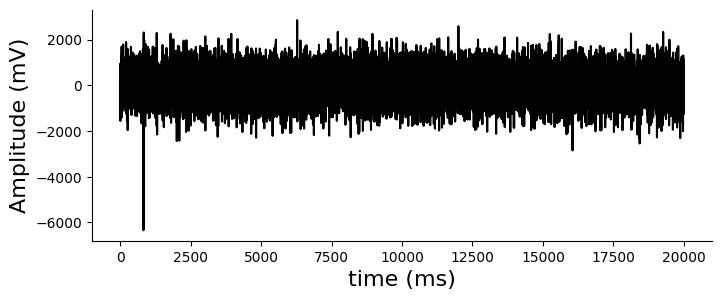

In [34]:
# Show trace from same channel as in vivo (channel 10)
fig = plt.figure(figsize=(8, 3))

ax3 = fig.add_subplot(1, 1, 1)
# plt.plot(traces[430000 : 630000, CHANNEL_ID], "k")
wind = 0
plt.plot(traces[wind * 20000 : (wind + 1) * 20000, CHANNEL_ID], "k")
ax3.set_xlabel("time (ms)", fontsize=16)
ax3.set_ylabel("Amplitude (mV)", fontsize=16)
ax3.spines[["right", "top"]].set_visible(False)

# SAVE FIGURE
plt.savefig("figures/2_realism/1_components/pdf/silico_horvath_site_10_lfp.pdf")
plt.savefig("figures/2_realism/1_components/svg/silico_horvath_site_10_lfp.svg")

Done